# VGG-16 Model 1b
## Preprocessing method: image_dataset_from_directory()
## Image size: (224, 224) 
## Images: Grayscale
## Frozen pretrained layers
## No image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [4]:
image_size = (224, 224)
batch_size = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(path_training,
                                                               color_mode = "grayscale",
                                                               seed=1993,
                                                               image_size = image_size)

val_ds =  tf.keras.preprocessing.image_dataset_from_directory(path_validation,
                                                              seed=1993,
                                                              color_mode = "grayscale",
                                                              image_size = image_size)

one_hot_encoded_train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
one_hot_encoded_val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


In [6]:
plt.figure(figsize=(10, 10))
class_names = val_ds.class_names
for images, labels in val_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)
valid_label = np.concatenate([y for x, y in val_ds], axis=0)

<Figure size 1000x1000 with 0 Axes>

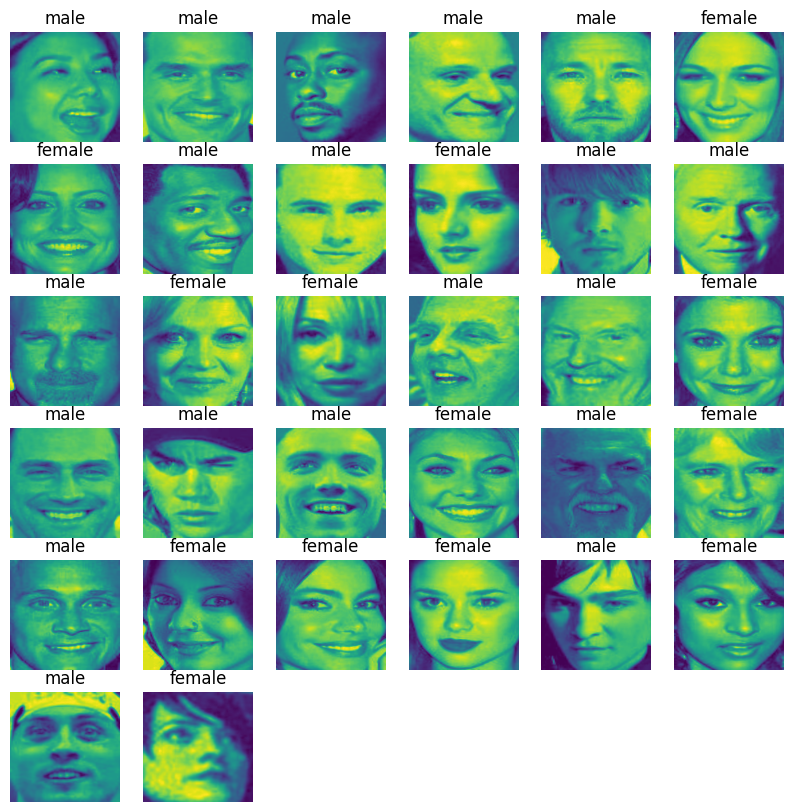

In [8]:
plt.show()

In [9]:
vgg_model = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg_model.trainable = False

# Model layers
input_tensor = tf.keras.layers.Input(shape=(224, 224, 1))
x = keras.layers.Conv2D(3,(3,3),padding='same')(input_tensor)
x = vgg_model(x)
out = keras.layers.Dense(2, activation='softmax')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=1000     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       30        
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,576
Trainable params: 2,032
Non-trainable params: 138,357,544
_________________________________________________________________


In [10]:
vgg16_fit = model.fit(one_hot_encoded_train_ds, 
                      epochs=epochs, 
                      validation_data=one_hot_encoded_val_ds,
                      callbacks=[callback])

Epoch 1/1000
1470/1470 [==============================] - 179s 114ms/step - loss: 0.5876 - accuracy: 0.7032 - val_loss: 0.5514 - val_accuracy: 0.7314
Epoch 2/1000
1470/1470 [==============================] - 167s 114ms/step - loss: 0.5383 - accuracy: 0.7408 - val_loss: 0.5161 - val_accuracy: 0.7557
Epoch 3/1000
1470/1470 [==============================] - 168s 114ms/step - loss: 0.5042 - accuracy: 0.7643 - val_loss: 0.4797 - val_accuracy: 0.7815
Epoch 4/1000
1470/1470 [==============================] - 168s 114ms/step - loss: 0.4808 - accuracy: 0.7829 - val_loss: 0.4805 - val_accuracy: 0.7743
Epoch 5/1000
1470/1470 [==============================] - 168s 114ms/step - loss: 0.4642 - accuracy: 0.7910 - val_loss: 0.4580 - val_accuracy: 0.7929
Epoch 6/1000
1470/1470 [==============================] - 168s 114ms/step - loss: 0.4536 - accuracy: 0.7978 - val_loss: 0.4395 - val_accuracy: 0.8055
Epoch 7/1000
1470/1470 [==============================] - 168s 114ms/step - loss: 0.4428 - accuracy:

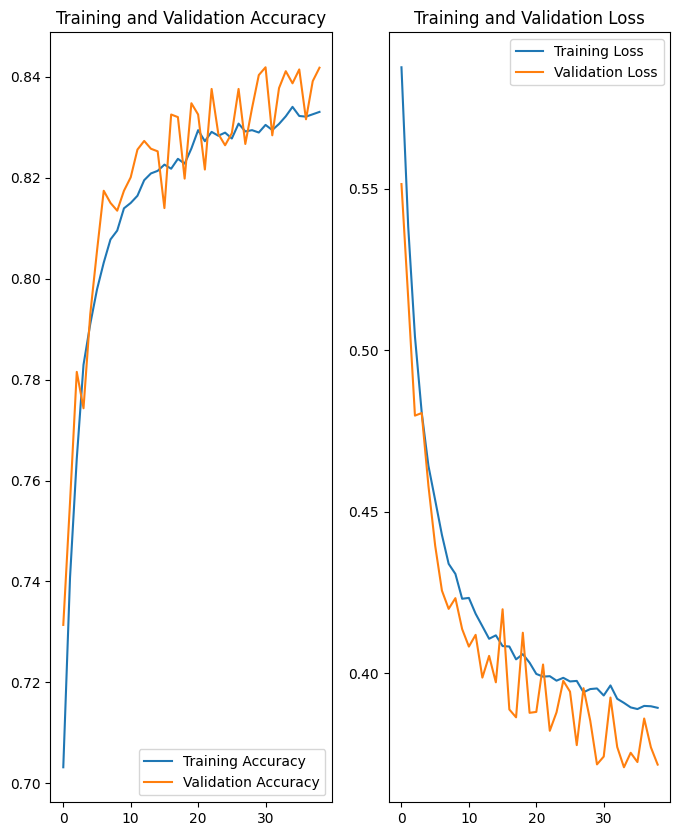

In [13]:
acc= vgg16_fit.history['accuracy']
val_acc = vgg16_fit.history['val_accuracy']

loss = vgg16_fit.history['loss']
val_loss = vgg16_fit.history['val_loss']

epochs_range = range(0, 39)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save('GC weights/Frozen/mod1b-gs')
model.save_weights('GC weights/Frozen/mod1b-gs/mod1b_gs_frozen.h5')

INFO:tensorflow:Assets written to: GC weights/Frozen/mod1b-gs/assets


INFO:tensorflow:Assets written to: GC weights/Frozen/mod1b-gs/assets
